In our data, we have 14 .csv files, all with unique categories from which we can draw different conclusions. Some of these files include driver information, team/constructor information, circuits, pit stop information, and qualifying information. Almost all .csv files share a column called “driverId” and a column called “raceId”. These categories being shared among the files allow us to utilize separate .csv files for analyses, linking together rows in separate files with the same driverId or raceId value. Another intriguing feature of the data is that some of the rows have NA values for certain categories. These especially include time in milliseconds for datasets like pit stop times and race finish times. For past races in which they did not have the technology to record this information, the columns remain as NA. 

First import the data set and do a really simple reformatting accross it to replace \N with pd.NA.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtpl
import scipy

circ = pd.read_csv('data_bases/circuits.csv')
constr_re = pd.read_csv('data_bases/constructor_results.csv')
constr_std = pd.read_csv('data_bases/constructor_standings.csv')
constr = pd.read_csv('data_bases/constructors.csv')
driver = pd.read_csv('data_bases/drivers.csv')
driver_std = pd.read_csv('data_bases/driver_standings.csv')
lap_times = pd.read_csv('data_bases/lap_times.csv')
pit_stops = pd.read_csv('data_bases/pit_stops.csv')
qualifying = pd.read_csv('data_bases/qualifying.csv')
races = pd.read_csv('data_bases/races.csv')
results = pd.read_csv('data_bases/results.csv')
sprint_results = pd.read_csv('data_bases/sprint_results.csv')
status = pd.read_csv('data_bases/status.csv')

#-1 MEANS NOT A VALUE

#YOU NEED TO USE THE ARRAY INDEX TO REFRENCE THE DATA
data_bases = [driver, constr, constr_re, constr_std, circ, driver_std, lap_times, pit_stops, qualifying, races, results, sprint_results, status]


def help_format(x):
    if x == '\\N':
        return pd.NA
    else:
        return x
def helper(x):
    x = x.apply(help_format)
    return x

def help_format_date(x):
    if pd.notna(x):
        return pd.to_datetime(x, format='%Y-%m-%d')
    else:
        return x
    
def to_num(x):
    if type(x) == type(pd.NA):
        return "-1"
    else:
        return x

count = 0
for i in data_bases:
    data_bases[count] = data_bases[count].apply(lambda x: helper(x))
    count = count + 1


#HOW THIS IS HOW I FIGURED OUT TO TRANSFORM A STRING TO AN INT
data_bases[0]['number'] = data_bases[0]['number'].apply(lambda x: to_num(x))
data_bases[0]['number'] = data_bases[0]['number'].astype(int)
data_bases[0]['driverId'] = data_bases[0]['driverId'].apply(lambda x: to_num(x))
data_bases[0]['driverId'] = data_bases[0]['driverId'].astype(int)
data_bases[1]['constructorId'] = data_bases[1]['constructorId'].apply(lambda x: to_num(x))
data_bases[1]['constructorId'] = data_bases[1]['constructorId'].astype(int)
data_bases[2]['constructorId'] = data_bases[2]['constructorId'].apply(lambda x: to_num(x))
data_bases[2]['raceId'] = data_bases[2]['raceId'].apply(lambda x: to_num(x))
data_bases[2]['constructorResultsId'] = data_bases[2]['constructorResultsId'].apply(lambda x: to_num(x))
data_bases[2]['points'] = data_bases[2]['points'].apply(lambda x: to_num(x))
data_bases[2]['points'] = data_bases[2]['points'].astype(int)
data_bases[2]['constructorId'] = data_bases[2]['constructorId'].astype(int)
data_bases[2]['constructorResultsId'] = data_bases[2]['constructorResultsId'].astype(int)
data_bases[2]['raceId'] = data_bases[2]['raceId'].astype(int)
for i in data_bases[3]:
    if i != 'positionText':
        data_bases[3][i] = data_bases[3][i].apply(lambda x: to_num(x))
        data_bases[3][i] = data_bases [3][i].astype(int)
data_bases[4]['lat'] = data_bases[4]['lat'].apply(lambda x: to_num(x))
data_bases[4]['lng'] = data_bases[4]['lng'].apply(lambda x: to_num(x))
data_bases[4]['alt'] = data_bases[4]['alt'].apply(lambda x: to_num(x))
#NOTE THESE ARE FLOATS NOT INTS
data_bases[4]['lat'] = data_bases[4]['lat'].astype(float)
data_bases[4]['lng'] = data_bases[4]['lng'].astype(float)
data_bases[4]['alt'] = data_bases[4]['alt'].astype(float)
for i in data_bases[5]:
    if i != 'positionText':
        data_bases[5][i] = data_bases[5][i].apply(lambda x: to_num(x))
        data_bases[5][i] = data_bases[5][i].astype(int)
data_bases[6]['raceId'] = data_bases[6]['raceId'].apply(lambda x: to_num(x))
data_bases[6]['driverId'] = data_bases[6]['driverId'].apply(lambda x: to_num(x))
data_bases[6]['lap'] = data_bases[6]['lap'].apply(lambda x: to_num(x))
data_bases[6]['position'] = data_bases[6]['position'].apply(lambda x: to_num(x))
data_bases[6]['milliseconds'] = data_bases[6]['milliseconds'].apply(lambda x: to_num(x))
data_bases[6]['raceId'] = data_bases[6]['raceId'].astype(int)
data_bases[6]['driverId'] = data_bases[6]['driverId'].astype(int)
data_bases[6]['lap'] = data_bases[6]['lap'].astype(int)
data_bases[6]['position'] = data_bases[6]['position'].astype(int)
data_bases[6]['milliseconds'] = data_bases[6]['milliseconds'].astype(int)
for i in data_bases[7]:
    if i != 'time' and i != 'duration' :
        data_bases[7][i] = data_bases[7][i].apply(lambda x: to_num(x))
        data_bases[7][i] = data_bases[7][i].astype(int)
count = 0
for i in data_bases[8]:
    if count <= 5:
        data_bases[8][i] = data_bases[8][i].apply(lambda x: to_num(x))
        data_bases[8][i] = data_bases[8][i].astype(int)
        count = count + 1
count = 0
for i in data_bases[9]:
    if count <= 3:
        data_bases[9][i] = data_bases[9][i].apply(lambda x: to_num(x))
        data_bases[9][i] = data_bases[9][i].astype(int)
        count = count + 1
count = 0
for i in data_bases[10]:
    if count <= 9 and i != 'positionText':
        data_bases[10][i] = data_bases[10][i].apply(lambda x : to_num(x))
        data_bases[10][i] = data_bases[10][i].astype(int)
        count =  count + 1
count = 0
for i in data_bases[11]:
    if count <= 9 and i != 'positionText':
        data_bases[11][i] = data_bases[11][i].apply(lambda x: to_num(x))
        data_bases[11][i] = data_bases[11][i].astype(int)
        count = count + 1
data_bases[12]['statusId'] = data_bases[12]['statusId'].apply(lambda x: to_num(x))
data_bases[12]['statusId'] = data_bases[12]['statusId'].astype(int)




#HOW TO MOVE A COLUMN TO A DATE
data_bases[0]['dob'] = data_bases[0]['dob'].apply(lambda x: help_format_date(x))
data_bases[9]['date'] = data_bases[9]['date'].apply(lambda x: help_format_date(x))

# Correlation between Qualifying 1st and Finishing 1st

For the first conclusion about our data, we have decided to use a Chi-Square test to determine statistical significance between driver who finish first in qualifying for a race, and the drivers who win the race. 

Null Hypothesis: There is no correlation between drivers finishing first im qualifying and finishing first in the following race.

Alternative Hypothesis: There is a correlation between drivers finishing first in qualifying and finishing first in the following race.

Alpha: .05

In [60]:
from scipy.stats.contingency import crosstab, chi2_contingency

pole = qualifying[qualifying['position'] == 1][['raceId', 'driverId']]
pole = pole.rename(columns={'driverId': 'pole_driver'})
# print(pole)

winners = results[results['position'] == '1'][['raceId', 'driverId']]
winners = winners.rename(columns={'driverId': 'race_winner'})
# print(winners)

merged = pd.merge(pole, winners, on='raceId', how='inner')
merged = merged[merged['raceId'] >= 900]
print(merged)

table = crosstab(merged['pole_driver'], merged['race_winner'])
contingency_table = table.count
res = chi2_contingency(contingency_table)
print("P-value: ", res.pvalue)

     raceId  pole_driver  race_winner
265     900            1            3
266     901            1            1
267     902            3            1
269     903            1            1
270     904            1            1
..      ...          ...          ...
489    1140          832          832
490    1141          846          830
491    1142          847          847
492    1143          830          830
493    1144          846          846

[228 rows x 3 columns]
P-value:  1.640386297964361e-42


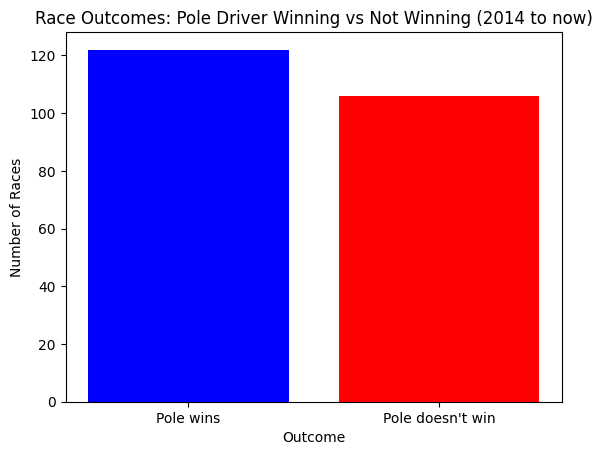

In [61]:
merged['pole_win'] = merged['pole_driver'] == merged['race_winner']
counts = merged['pole_win'].replace({True: "Pole wins", False: "Pole doesn't win"}).value_counts()

mtpl.bar(counts.index, counts, color=['blue', 'red'])
mtpl.title("Race Outcomes: Pole Driver Winning vs Not Winning (2014 to now)")
mtpl.xlabel("Outcome")
mtpl.ylabel("Number of Races")
mtpl.show()

After completing a Chi-Square test and graphing the data, we find a P-value of 1.64e-42, an extremely small number. This indicates that there is a very statistically significant correlation between the drivers finishing first in the qualifying rounds and winning the race afterwards. With this, we reject the null hypothesis that there is no correlation between these categories of data. This result comes as no surpirse for fans of Formula 1. The qualifying stage is extremely important for the actual race which usually comes the next day. This stage determines what position the drivers will begin the race in. 

# Pit stop durations - Identifying outliers

In our second conclusion, we look to determine if there are any outliers in the pit stop durations dataset.

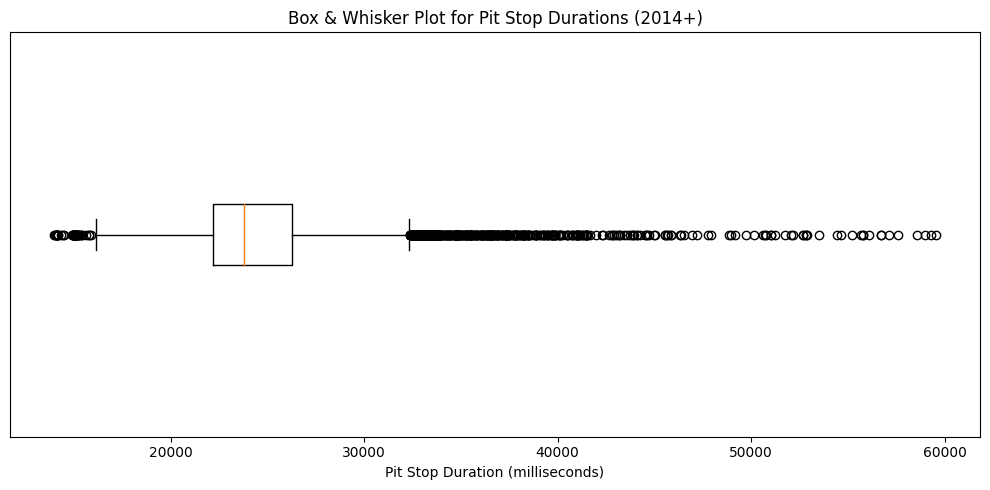

Median pit stop duration (milliseconds): 23792.0


In [62]:
# 2nd statistical methods: Are there any unusually long pit stop durations(outlier) in Formula 1 races from 2014 onwards?
# Answer: Yes, there are many long pit stops that clearly stand out as outliers in the data.
# These extreme values could be caused by technical issues, penalties, or even data errors, and should be analyzed separately from typical pit stop behavior.

# Dataset used: pit_stops.csv (which includes: raceId, driverId, stop, lap, time, duration, milliseconds)


# Merge pit stop data with race info to get the year
pit_merged = pd.merge(pit_stops, races[['raceId', 'year']], on='raceId')


# Filter for races from 2014 onward
pit_filtered = pit_merged[pit_merged['year'] >= 2014].copy()


# Remove bad durations with ":" like 16:37.029, those extreme and unusual long pitstop time
pit_filtered = pit_filtered[pit_filtered['duration'].str.contains(":") == False]


# Drop missing values
pit_filtered = pit_filtered.dropna(subset=['milliseconds'])


mtpl.figure(figsize=(10, 5))
mtpl.boxplot(pit_filtered['milliseconds'], vert=False)
mtpl.title("Box & Whisker Plot for Pit Stop Durations (2014+)")
mtpl.xlabel("Pit Stop Duration (milliseconds)")
mtpl.yticks([]) # Remove the '1' in default y-axis
mtpl.ticklabel_format(style='plain', axis='x') # Disables scientific notation
mtpl.tight_layout()
mtpl.show()


print("Median pit stop duration (milliseconds):", pit_filtered['milliseconds'].median())


With the resulting Box-and-Whisker plot, we observe that there are a large sum of outliers beyond the first standard deviation. A small few of these outliers almost reach 60000 milliseconds, which is roughly three times the median of 23792 milliseconds, or 23.8 seconds. There are also outliers that fall much shorter than the average pit stop time, reaching close to 10000 milliseconds, or 10 seconds.

# Identifying Top Constructors since 2000

Our third and last statistical conclusion will be to identify the top teams/constructors over the last 25 years in Formula 1. By graphing all active teams from the years 2000-onward and their total points accumulated since then, we should be able to see which teams are the strongest in the Formula 1 space.

In [63]:
teams = constr.merge(results, on='constructorId')
teams = teams.merge(races, on='raceId')

# Rename the merged result
teams_simple = teams[['name_x', 'points', 'year']]
teams_simple = teams_simple.rename(columns={'name_x':'name'})
teams_simple

# Just get the top teams that have more than 50 points
top_teams = teams_simple[teams_simple['year'] > 2000].groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index()
top_teams = top_teams[top_teams['points'] >= 50]
display(top_teams)

,name,points
0,Red Bull,7673.0
1,Ferrari,7661.5
2,Mercedes,7591.5
3,McLaren,4583.0
4,Williams,1609.5
5,Renault,1465.0
6,Force India,1098.0
7,Lotus F1,706.0
8,Toro Rosso,500.0
9,Alpine F1 Team,498.0


<BarContainer object of 22 artists>

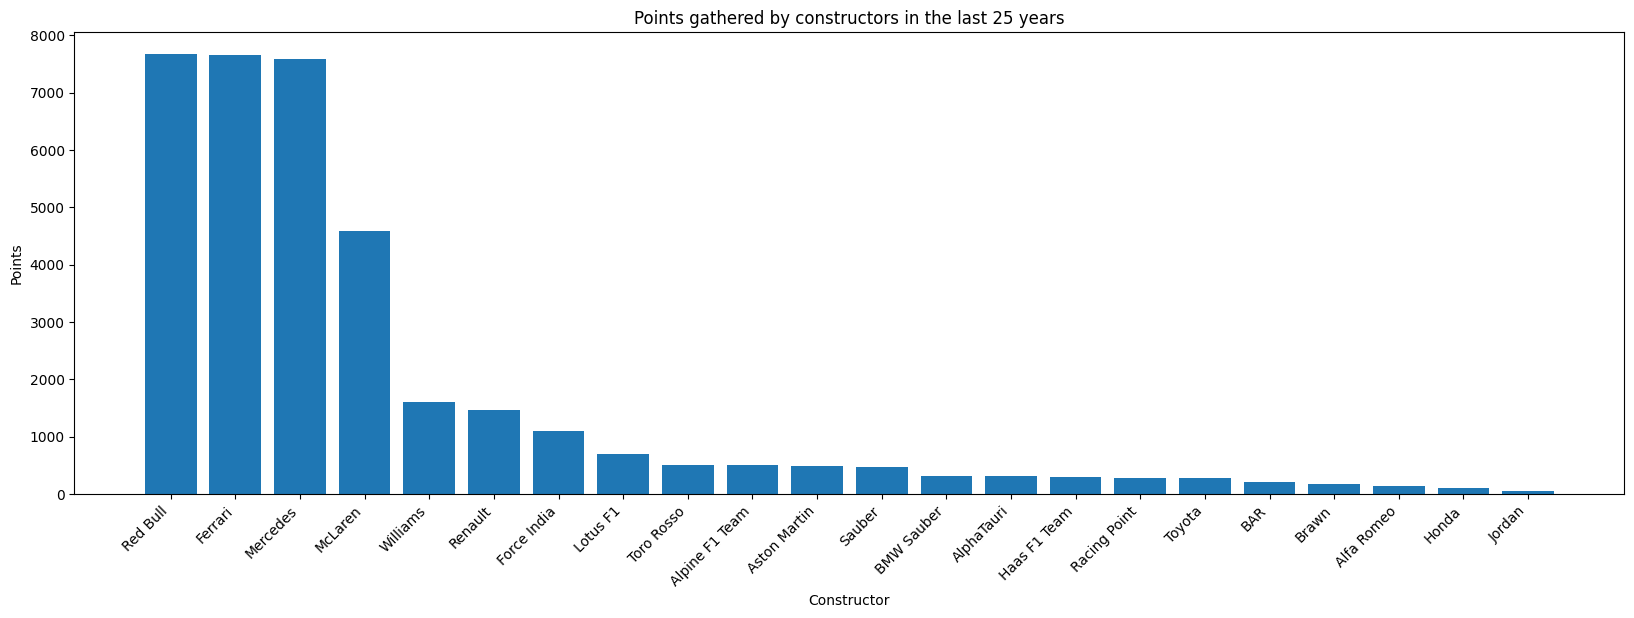

In [64]:
mtpl.figure(figsize=(20,6))
mtpl.xticks(rotation=45, ha='right')
mtpl.xlabel('Constructor')
mtpl.ylabel('Points')
mtpl.title('Points gathered by constructors in the last 25 years')
mtpl.bar(top_teams['name'], top_teams['points'])

As we can see, there are very large differences in total points earned between the first four performing teams and every other team in recent history. Red Bull, Ferrari, Mercedes, and McLaren appear to dominate the rest of their competition in the Formula 1 space. For fans of Forumla 1, this comes as no surprise. This graph goes to show what some might call the monopoly that the powerful few top constructors have in the Formula 1 series.